
# Project: Movie Night: Investigating the Attributes of Good Movies and High Grossing Ones 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<p>In this project I will be investigating the attributes that make a good movie (high viewer ratings) and the attributes that make a successful movie (high revenue). Are these correlated? Is one a subset of the other (i.e. all good movies are successful but not all successful movies good)? Do different genres have higher instances of good movies? Higher grossing movies?</p>

<p>I will be using a set of cleaned data (taken from Kaggle initially) to explore these questions. The variables I will primarily explore will be user rating and adjusted revenue. These will be my two indentifiers. A top 25 percentile user rating will be considered a high quality movie and a top 25 percentile adjusted revenue will be considered a highly successfl movie. The three major traits I will look at are: genre, adjusted budget, and runtime.</p>

<p>I am perhaps most interested in the genre question. Are certain genres more prone to being considered "good"? To making more money? If I were to predict, I would predict that "action" or other similar genres are going to be some of the most successful, and "drama" or similar will be the highest rated. Though it should be noted that these are user ratings and not critic ratings, and many times viewers and critics disagree on the quality of a film.</p>

In [46]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [47]:
# Load your data and print out a few lines. Perform operations to inspect data
tmdf = pd.read_csv('tmdb-movies.csv')
#   types and look for instances of missing or possibly errant data.
tmdf.info()
tmdf.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

(10866, 21)

<p>First let's note there are 10,866 total entries. Here we see that there are 23 entries that do not have something for the 'genres' column. Let us look at these columns now.</p>

In [48]:
tmdf[tmdf['genres'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


<p>Luckily there are very few without genres and so, to rectify this problem, I will simply search the movie on IMBd via IMBd id and enter the genre (in the same format as the others) manually into the csv file and save it under a different name. Also, if applicable, I will change the name to its English title.</p>

<p>Now let's check the new file.</p>

In [49]:
tmdf = pd.read_csv('tmdb_movies_filled.csv')
tmdf[tmdf['genres'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


<p>Now let's repeat the process for the other variable we care about, namely budget, runtime, revenue, and user score. For these, values of 0 will be considered incorrect, but rather than filling them in manually, I will simply drop them (since finding accurate data for things like budget is trickier than genre).</p>

<p>Unfortunately there are quite a few movies without adjusted budges or revenues (5,696 and just over 6,000, respectively) but the sample size remaining will hopefully still be large enough to draw good conclusions. After all, 4,000ish data points is still a good number.</p>

In [50]:
#Let's count how many rows have missing data
i = 0
for index, row in tmdf.iterrows():
    if row['budget_adj'] == 0:
        i += 1
print(i)

5696


In [51]:
tmdf_nonzero = tmdf[tmdf['revenue_adj'] != 0]
tmdf_final = tmdf_nonzero[tmdf_nonzero['budget_adj'] != 0]
i = 0
for index, row in tmdf_final.iterrows():
    if row['budget_adj'] == 0:
        i += 1
    if row['revenue_adj'] == 0:
        i += 1
print(i)
#Now we know that none of the entries have values of 0 for budget or revenue (I also checked user scores and runtime -- all good)
#Our final data set has 3,855 data points

tmdf_final.to_csv('tmdf_final.csv', index=False)

0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Can you buy quality?

<p>In this section I will be looking at the cost of a movie (its adjusted budget) vs the score it recieves. Again, the top 25th percentile will be considered a "great" movie (I will add these categories to the datafram in this section as well). Are these movies generally more expensive? Less expensive? Or is there no correlation?</p>

<p>But first, let's take a look at the distribution of ratings, this will give us a good idea of what to expect from our values. Truly well-distributed ratings would be centered at five and have a normal distrubution. But do they?</p>

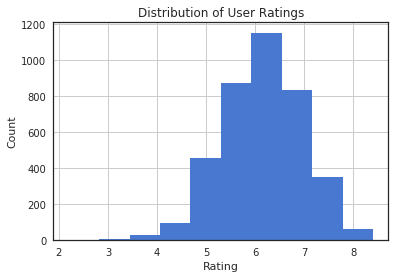

In [52]:
#Histogram of data
tmdf_final['vote_average'].hist();
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Count');

<p>Here we can see that while the data has a pretty normal distribution, it is skewed to the right. That is, the mean is not 5, but rather 6. This means that a movie of rating six is actually an 'average' film, and not a movie of rating 5 (which would be our assumption before examining the data). With that in mind, let us continue by breaking up the ratings into quartiles.</p>

In [53]:
#Let's add the movie "quality designation". First let's figure out the relevant stats for user score
tmdf_final['vote_average'].describe()


count    3855.00000
mean        6.16786
std         0.79504
min         2.20000
25%         5.70000
50%         6.20000
75%         6.70000
max         8.40000
Name: vote_average, dtype: float64

In [54]:
#Now lets add 'quality' to the df. They will be 4 levels: poor, below_avg, good, great

def qualityfnc(df):
    if df['vote_average'] < 5.7:
        return 'poor'
    elif 5.7 <= df['vote_average'] < 6.2:
        return 'below average'
    elif 6.2<= df['vote_average'] < 6.7:
        return 'good'
    else:
        return 'great'
    
tmdf_final['quality'] = tmdf_final.apply(qualityfnc, axis=1)
tmdf_final.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,quality
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,good
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,great
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,good
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,great
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,great


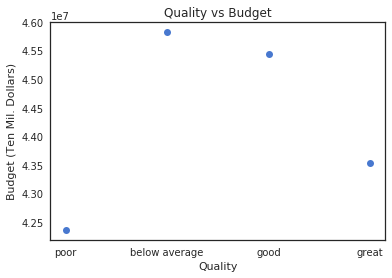

quality
below average    4.582061e+07
good             4.543759e+07
great            4.353394e+07
poor             4.236367e+07
Name: budget_adj, dtype: float64


In [55]:
#Now let's make a box plot of the average budget for each category
sns.set(style='white', palette='muted')
budget_quality = tmdf_final.groupby('quality').mean()['budget_adj']
labels = ['poor','below average','good','great']
budgets = []
for x in labels:
    budgets.append(budget_quality[x])
    
plt.plot(budgets, 'o')
plt.ylabel('Budget (Ten Mil. Dollars)')
plt.xlabel('Quality')
plt.title('Quality vs Budget')
plt.xticks([0,1,2,3], labels)
plt.show()
print(budget_quality)





<p>From the above graph it is clear there is no correlation between the amount of money spent on a movie (adjusted budget) and the quality of the movie produced. In fact, the movies with the highest average budget are the below average movies! Now lets looks at a slightly more detailed view, a scatter plot of every movie in our dataset.</p>

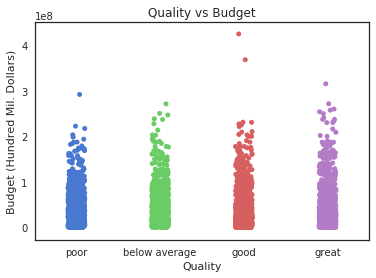

In [56]:

ax = sns.stripplot(x='quality', y='budget_adj', data=tmdf_final, order=['poor','below average','good','great'], jitter=True)
ax.set(xlabel='Quality', ylabel='Budget (Hundred Mil. Dollars)', title='Quality vs Budget');

<p>It is even clearer here: a movie's budget seems to have no bearing on whether or not this it is a good movie. This somewhat confirms our personal experience. A ton of high budget films are terrible, and there are many films with very low budgets that become classics.</p>

### Research Question 2: Does length really matter?

<p>Here I will be examining a movies runtime in relation to two things: its rating and its revenue. This is also a good time to add the categorical labels for revenue (flop, below_average, successful, very_successful). Are longer movies generally regarded as better? Do they make more money? Let's find out.</p>

<p>Just as with ratings, let us first look at the histogram of the revenue, to get a sense of the data.</p>

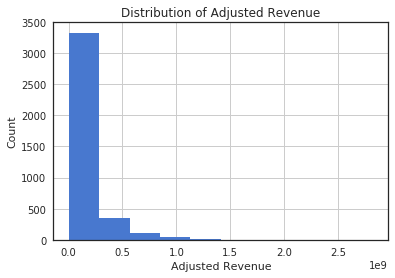

In [57]:
tmdf_final['revenue_adj'].hist();
plt.title('Distribution of Adjusted Revenue')
plt.xlabel('Adjusted Revenue')
plt.ylabel('Count');

<p>Here we see a very different distribution from the ratings. This is very heavily skewed to the left, and doesn't appear to be normal. This makes a little bit of sense, as a bunch of movies are going to make very little money, and only a few will make a lot. In this case, we will still use quartiles, but with the understanding that a movie on the edge of the top quartile may still make significantly less money than one at the top.</p>

In [58]:
revenues = tmdf_final['revenue_adj'].describe()
print(revenues)

count    3.855000e+03
mean     1.370294e+08
std      2.160944e+08
min      2.370705e+00
25%      1.834123e+07
50%      6.171861e+07
75%      1.632401e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64


In [59]:
#Making categories for revenue
def successfnc(df):
    if df['revenue_adj'] < revenues[4]:
        return 'flop'
    elif revenues[4] <= df['revenue_adj'] < revenues[5]:
        return 'below average'
    elif revenues[5]<= df['revenue_adj'] < revenues[6]:
        return 'successful'
    else:
        return 'very successful'
    
tmdf_final['success'] = tmdf_final.apply(successfnc, axis=1)
tmdf_final.head()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,quality,success
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,good,very successful
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,great,very successful
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,good,very successful
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,great,very successful
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,great,very successful


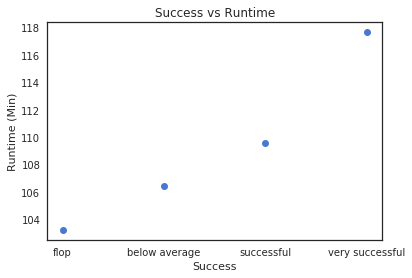

success
below average      106.407061
flop               103.209544
successful         109.581950
very successful    117.661826
Name: runtime, dtype: float64


In [60]:
#Now let's plot the average runtime for each category
runtime_success = tmdf_final.groupby('success').mean()['runtime']
labels1 = ['flop','below average','successful','very successful']
runtimes = []
for x in labels1:
    runtimes.append(runtime_success[x])
    
plt.plot(runtimes, 'o')
plt.ylabel('Runtime (Min)')
plt.xlabel('Success')
plt.title('Success vs Runtime')
plt.xticks([0,1,2,3], labels1)
plt.show()
print(runtime_success)

<p>Interesting. It seems from this that longer runtimes are associated with higher revenues. Let's take another look using a box plot.</p>

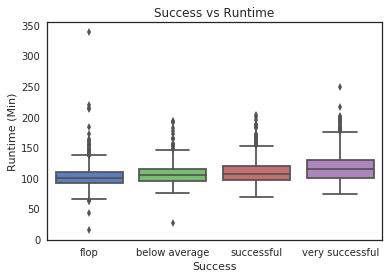

In [61]:
ax = sns.boxplot(x='success', y='runtime', data=tmdf_final, order=['flop','below average','successful','very successful'])
ax.set(xlabel='Success', ylabel='Runtime (Min)', title='Success vs Runtime');

<p>The box plot confirms what the inital graph showed us: a movie with higher revenue is more likely to be longer than a movie with less revenue. This again confroms with our everyday experience. Hollywood blockbusters tend to fall around 2 hours, or 120 minutes, and they are generally the most successful (money-wise) films of the year. However, the trend is slight, and, as is made clear with the box plot, there are tons of outliers. I am particuarly interested in whatever movie has a runtime near 350 minutes.</p>

In [62]:
for index, row in tmdf_final.iterrows():
    if row['runtime'] > 300:
        print(row)

id                                                                  43434
imdb_id                                                         tt1321865
popularity                                                       0.534192
budget                                                           18000000
revenue                                                            871279
original_title                                                     Carlos
cast                    Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
homepage                                                              NaN
director                                                  Olivier Assayas
tagline                                    The man who hijacked the world
keywords                       gun|car bomb|tv mini-series|terrorism|opec
overview                The story of Venezuelan revolutionary, Ilich R...
runtime                                                               338
genres                                

<p>Ah, it is a TV Miniseries, which explains both the long runtime and the low revenue.</p>

<p>Now let us examine runtime in relation to quality. We will plot the two against each other in a scatter plot and see if a trend emerges.</p>

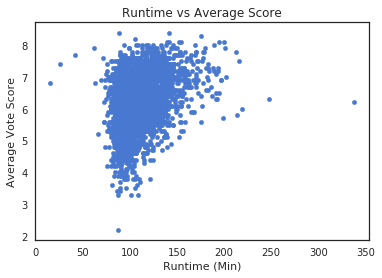

In [63]:
tmdf_final.plot.scatter('runtime','vote_average');
plt.xlabel('Runtime (Min)')
plt.ylabel('Average Vote Score')
plt.title('Runtime vs Average Score');

<p>This is sort of amorphous; let's try and fit a line to it.</p>

The R value is 0.3519089800230591, which is very low and shows that there is not a strong correlation 
between our two variables.


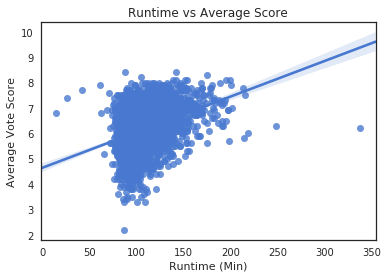

In [64]:
ax = sns.regplot(x='runtime',y='vote_average', data=tmdf_final)
ax.set(xlabel='Runtime (Min)', ylabel='Average Vote Score', title='Runtime vs Average Score');

slope, intercept, rvalue, pvalue, stderr = stats.linregress(tmdf_final['runtime'],tmdf_final['vote_average'])

print('The R value is {}, which is very low and shows that there is not a strong correlation \nbetween our two variables.'.format(rvalue))

<p>As we can see, there is not much correlation between runtime and the average score other than most really poorly rated movies are around 100 to 150 minutes long.</p>

<p>From these observations we can draw a few conclusions about the correlation between runtime and a movies financial and critical success. Financially successful movies do, in fact, tend to be longer than their shorter counterparts (though some of this is probably due to many made-for-TV movies being short and not making much money). However, the length of a film does not seem to be correlated with whether or not it is a 'good' or 'bad' movie in the eyes of veiwers.</p>

### Research Question 3: Exploring genres.

<p>Now for the final question and topic I will be exploring: genres. I want to know if certain genres make more money than others or are higher rated. For example, do action movies tend to have a higher revenue than biopics? Let's find out.</p>

<p>The first step will be dealing with the format of the genres in our dataframe. They are currently in a single string with each genre seperated by a '|' symbol. I want to turn this string into a list (so 'Action|Adventure' becomes ['Action','Adventure']). Then comes the difficult part. I want to determine the average revenue for each genre and since many films fall into multiple genres, they will be counted each time (meaning the total number of observations is going to be much higher than 3,855).</p>

<p>Because this would be extremely complicated to try and do in the dataframe, I am going to use a simpler, three-step process. First, I will build a dictionary of the genres (where the genre is the key and the number of movies in that genre is the value). Then, using that, I will build a dictionary of the summed ratings, (where the genre is the key and the sum of the the rating of the movies in that genre is the value). Finally, I will divide the sum of ratings by the number of movies to obtain and average rating for that genre, leaving me with a dictionary that has genres for keys and average ratings for value. This is much cleaner than trying to split up the data points in the dataframe so that each film with multiple genres appears multiple times, etc.</p>

In [65]:
tmdf_final['genres'] = tmdf_final['genres'].apply(lambda x: x.split('|'))
tmdf_final.head()



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,quality,success
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,good,very successful
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,great,very successful
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,good,very successful
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,great,very successful
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,great,very successful


In [66]:
#Generate a dictionary of all the genres
genres = {}
for index, row in tmdf_final.iterrows():
    for x in row['genres']:
        if x not in genres:
            genres[x] = 1
        else:
            genres[x] += 1
            
print(genres)

{'Action': 1086, 'Adventure': 749, 'Science Fiction': 520, 'Thriller': 1205, 'Fantasy': 396, 'Crime': 652, 'Western': 52, 'Drama': 1757, 'Family': 425, 'Animation': 201, 'Comedy': 1358, 'Mystery': 344, 'Romance': 667, 'War': 119, 'History': 129, 'Music': 136, 'Horror': 463, 'Documentary': 35, 'Foreign': 13, 'TV Movie': 1}


In [67]:
#We are going to make dictionaries that have the genre as a key and the average rating and average revenue as values
genre_rating = {}
for index, row in tmdf_final.iterrows():
    for x in row['genres']:
        if x not in genre_rating:
            genre_rating[x] = row['vote_average']
        else:
            genre_rating[x] += row['vote_average']
            
for g in genre_rating:
    genre_rating[g] = genre_rating[g] / genres[g]
    
genre_rev = {}
for index, row in tmdf_final.iterrows():
    for x in row['genres']:
        if x not in genre_rev:
            genre_rev[x] = row['revenue_adj']
        else:
            genre_rev[x] += row['revenue_adj']
            
for g in genre_rev:
    genre_rev[g] = genre_rev[g] / genres[g]
    


<p>Now that we have the values we want, let's plot them. First up is the rating.</p>

{'Action': 6.036003683241253, 'Adventure': 6.124432576769025, 'Science Fiction': 6.0273076923076925, 'Thriller': 6.065892116182567, 'Fantasy': 6.062878787878787, 'Crime': 6.298619631901837, 'Western': 6.467307692307694, 'Drama': 6.395959021058627, 'Family': 6.127058823529406, 'Animation': 6.380597014925371, 'Comedy': 6.026435935198821, 'Mystery': 6.194767441860466, 'Romance': 6.189955022488754, 'War': 6.58655462184874, 'History': 6.578294573643411, 'Music': 6.315441176470591, 'Horror': 5.710799136069117, 'Documentary': 6.659999999999999, 'Foreign': 6.123076923076923, 'TV Movie': 5.6}


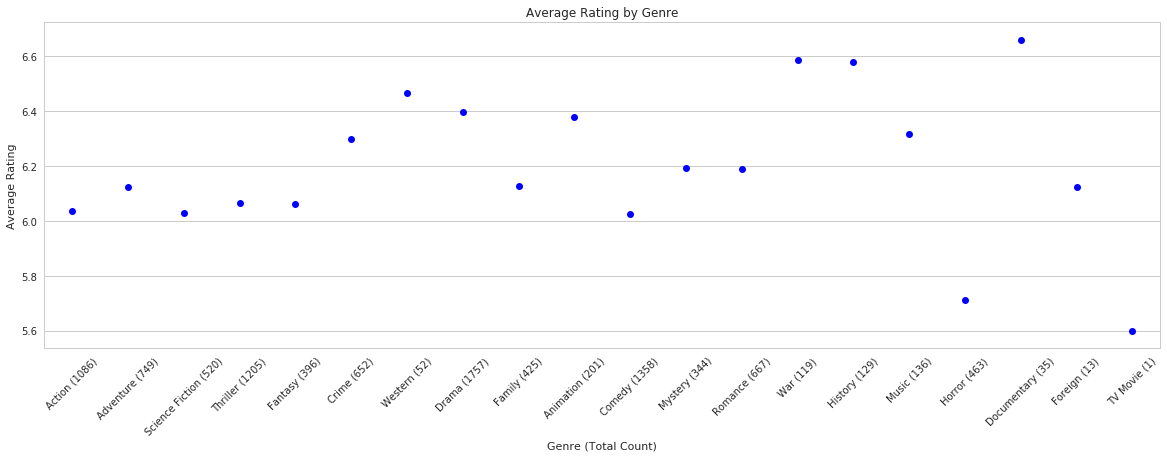

In [68]:
#making labels, a multi-step process
genre_labels = []
for key in genres:
    genre_labels.append(key)
    
genre_ratings = []
for x in genre_labels:
    genre_ratings.append(genre_rating[x])

genre_labels2 = list(genre_labels)
for x in range(len(genre_labels2)):
    genre_labels2[x] = genre_labels2[x] + ' ({})'.format(genres[genre_labels2[x]])
    

    
plt.figure(figsize=(20,6))    
sns.set_style('whitegrid')
ax = sns.stripplot(x=genre_labels2, y=genre_ratings, color='b', size=7)
ax.set(xlabel='Genre (Total Count)', ylabel='Average Rating', title='Average Rating by Genre')

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
print(genre_rating)

<p>We can make a few observations from this data and plot. The first is that the three highest rated genres are Documentary, War, and History (in that order). This sort of fits with the idea that those genres tend to produce more 'artsy' films and thus garner more critical respect. It is interesting how low of an average rating Horror movies have though I predict we will see them have a high revenue. Action movies seem to fall right in the middle, along with some other very common genres like Sci-Fi and Thriller. There are many more interesting observations to be made; I will get into some of them in the final conclusion.</p>

<p>Now let's look at revenue using a similar process.</p>

{'Action': 195208913.49061, 'Adventure': 271407469.1085948, 'Science Fiction': 201766245.982284, 'Thriller': 128065331.21974105, 'Fantasy': 249992751.60332137, 'Crime': 110227300.64372562, 'Western': 135674767.38749453, 'Drama': 101321317.226707, 'Family': 243791030.51747182, 'Animation': 290957382.2694419, 'Comedy': 121308528.53936587, 'Mystery': 113621019.75509535, 'Romance': 113519845.24085985, 'War': 155898111.70704767, 'History': 121661724.41103491, 'Music': 134566015.88827792, 'Horror': 81406555.09701768, 'Documentary': 24806165.83365503, 'Foreign': 12733777.803192308, 'TV Movie': 58389103.04}


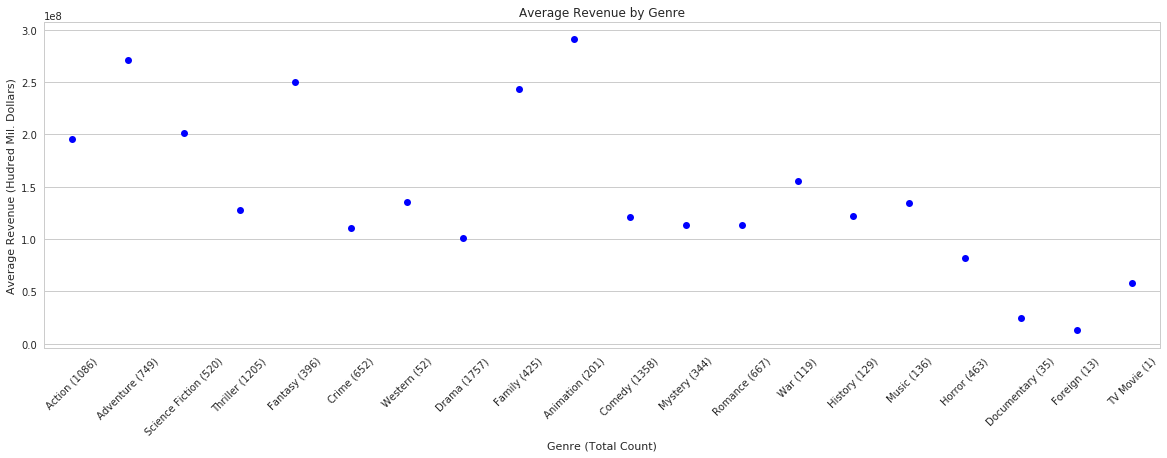

In [69]:
genre_revs = []
for x in genre_labels:
    genre_revs.append(genre_rev[x])
    
plt.figure(figsize=(20,6))    
sns.set_style('whitegrid')
ax = sns.stripplot(x=genre_labels2, y=genre_revs, color='b', size=7)
ax.set(xlabel='Genre (Total Count)', ylabel='Average Revenue (Hudred Mil. Dollars)', title='Average Revenue by Genre')

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
print(genre_rev)

<p>Some brief conclusions from the above data and plot. The three highest rated genres (war, history, documentary) all fall at average or below average for revenue. This isn't really a surprise, especially for the documentary genre. The four highest revenue generating genres are Animation, Family, Fantasy, and Adventure. These are all very escapist genres, and so it makes sense that they draw some of the biggest paydays (especially Family and Animation, where whole families will go to see them). In another non-shocker, Foreign genre films rank lowest in terms of revenue generation.</p>

<p>We have explored a variety of topics, now let's try and wrap that all up.<p>

<a id='conclusions'></a>
## Conclusions

<p>First, let us summarize what we investigated in the above work. We looked at three main things: 1) Does the budget of a film correlate with how highly it is rated (i.e. does spending more money possibly improve the quality)? 2) Is the length of the film at all correlated with how much money the film makes (i.e. do longer films have a higher revenue)? And 3) What are the associations between genre and both quality and revenue (are certain genres rated higher on average? make more money?)?</p>

<p>We explored these questions using a cleaned dataset with 3,855 films. We defined the categories of both critical success and financial success in four stages, using the quartiles of the dataset as demarcation points. We used a combination of packages in Python to explore and analyze the data, including: Pandas, matplotlib, seaborn, and NumPy.</p>

<p>Luckily, the answers to the questions were clearly demonstrated by the data. First, the budget of a film appears to have no correlation with how highly it is rated. Both low and high budget films recieve high ratings, and both low and high budget films recieve low ratings. The means and the categorical scatter plots simply serve to support that finding. Second, the legnth of the film does seem to correlate with the financial success of the movie. As revenue increased, so did the average runtime. This is worth exploring in more detail and possibly seeing if there is a good-fitting linear regression.</p>

<p>The final question took a little more work to explore, but a combination of creative dictionaries, lists, and Pandas's dataframs allowed us to answer it. The highest rated (on average) genres were history, war, and documentary. The highest revenue genres (on average) were animation, family, fantasy, and adventure. Both of these were expected results, though I was surprised that the action genre wasn't higher on the revenue list. It is possible that this is because basically every movie can be classed as an 'action' movie.</p>

<p>We would be remiss not to acknowladge the shortcomings of this exploration and analysis. One major one is the lack of real statistical tools. Other than a few linear regressions and comparing means, there wasn't much statistical rigor employed. Further and more targeted studies of this topic could certainly use those sorts of tools to their advantage. Another issue was that over half of the intial data set had to be dropped due to missing data. Being able to analyze double the number of films would provide even greater confidence in our findings. Finally, there are many questions left unanswered. Obviously one report cannot explore everything, and so I'd hope that other questions, especially using data we didn't (actors, directors, taglines), can be posed and explored in other studies.</p>

<p>Overall we learned a lot in this exploration, both about programming and about the dataset itself. I hope that anyone reading feels the same way. Thank you!</p>

<p>John Coletta</p>


In [70]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0